In [99]:
import torch 
import torchvision 
from torch.utils.data import  DataLoader,datasets,Subset
from torchvision import transforms,datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torchvision.models as models
import torchtext
from torchtext.data import get_tokenizer

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.is_available()

True

# Functions

In [84]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

def Load_triplet(triplet,images):
    tokenizer = get_tokenizer("basic_english")
    ids = tokenizer(triplet)
    images = images[0].__getitem__
    anchor = ids[0]
    truthy = ids[1]
    falsy = ids[2]
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
   

    
    print(anchor)
    

# Hyperperameters

In [3]:
num_epochs = 15
num_classes = 2
learning_rate = 0.001

# Main stuff

In [13]:
test_triplets = pd.read_csv('./task4_be9ai3nsdj/test_triplets.txt',delimiter="\t",header=None)
train_triplets = pd.read_csv('./task4_be9ai3nsdj/train_triplets.txt',delimiter="\t",header=None)

In [65]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])
dataset = datasets.ImageFolder('./task4_be9ai3nsdj/food/',transform = transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


False

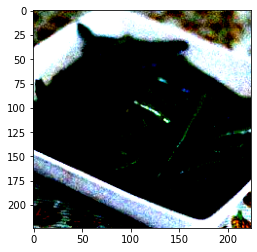

In [67]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
images, labels = next(iter(dataloader))
plt.imshow(images[0].permute(1, 2, 0) )
images.is_cuda

In [74]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

'02461 03450 02678'

In [85]:
Load_triplet(train_triplets[0][0],dataset)

02461


In [97]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.resnet50(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 